In [1]:
import keras
from keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from matplotlib import pyplot as plt

### Dataset

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


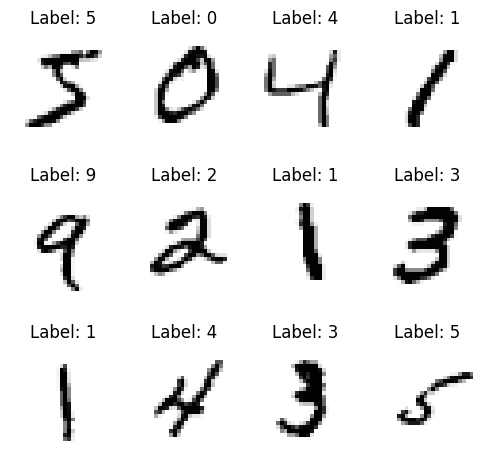

In [3]:
plt.figure(figsize=(5, 5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.title(f"Label: {y_train[k]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Preprocessing

In [7]:
X_train_flat = X_train.reshape(60000, 784).astype('float32')
X_valid_flat = X_valid.reshape(10000, 784).astype('float32')

In [11]:
X_train_flat_norm = X_train_flat / 255
X_valid_flat_norm = X_valid_flat / 255

In [14]:
n_classes = 10
y_train_ohe = keras.utils.to_categorical(y_train, n_classes)
y_valid_ohe = keras.utils.to_categorical(y_valid, n_classes)

### Model

In [21]:
import tensorflow.keras.backend as K
K.clear_session()

In [22]:
model = Sequential([
    keras.Input(shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [26]:
model.fit(X_train_flat_norm, y_train_ohe, epochs=50, verbose=1, validation_data=(X_valid_flat_norm, y_valid_ohe))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8853 - loss: 0.4082 - val_accuracy: 0.9644 - val_loss: 0.1188
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9695 - loss: 0.0998 - val_accuracy: 0.9738 - val_loss: 0.0872
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9790 - loss: 0.0668 - val_accuracy: 0.9693 - val_loss: 0.1000
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9832 - loss: 0.0532 - val_accuracy: 0.9737 - val_loss: 0.0815
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9882 - loss: 0.0379 - val_accuracy: 0.9766 - val_loss: 0.0750
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9894 - loss: 0.0343 - val_accuracy: 0.9758 - val_loss: 0.0859
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9766 - val_loss: 0.0872
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9930 - loss: 0.0219 - 